# Récupérer de données sur une page web en utilisant beautiful Soup

In [2]:
## all imports
from IPython.display import HTML
import numpy as np
import urllib
import bs4 #this is beautiful soup

import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Telechargement de la page

In [3]:
url = "https://fr.wikipedia.org/wiki/Grenoble"
page = urllib.request.urlopen(url).read()

Visualisation de la page : 
<img src="screenshotMeteoGrenoble.png">

## Recuperation des valeurs dans la page wikipedia : Parsing

In [4]:
# On tranforme le text en document BS
soup = bs4.BeautifulSoup(page,"lxml")

# On ne recupere que les tableaux
table = soup.find_all('table')

# On ne recupere que les tableaux de la class wikitable centre
tableData = [tbl for tbl in table if not tbl.get('class') is None 
             if tbl.get('class') == ['wikitable','centre']]

# TODO On recupere le tableau qui a le mot meteo en caption
tableName = 'Comparaison des données météorologiques de Grenoble'
meteoData = [x for x in tableData if not x.caption is None][0]

# Recuperation des entetes de colonnede tableau
entetesC = meteoData.find('tr').find_all('th')
entetesC = [e.text for e in entetesC]
entetesC = [e.replace('\n','') for e in entetesC]

# Recupération des entetes de ligne
entetesL = meteoData.find_all('tr')[1:]
entetesL = [val.find('th').text for val in entetesL]

# Recuperation des valeurs
valeurs = meteoData.find_all('tr')[1:]
valeurs = [tr.find_all('td') for tr in valeurs]
valeurs = [[float(td.text.replace(' ','')) for td in lotd] for lotd in valeurs]

# Enregistrement au format python
df = pd.DataFrame(valeurs,index = entetesL,columns = entetesC[1:])



,Ensoleillement (h/an),Pluie (mm/an),Neige (j/an),Orage (j/an),Brouillard (j/an)
Moyenne nationale,1973.0,770.0,14.0,22.0,40.0
Grenoble (Aéroport Grenoble-Isère),2066.0,934.0,17.0,32.0,28.0
Paris,1661.0,637.0,12.0,18.0,10.0
Nice,2724.0,733.0,1.0,29.0,1.0
Strasbourg,1693.0,665.0,29.0,29.0,53.0
Brest,1605.0,1211.0,7.0,12.0,75.0


# Quelques viz

In [13]:
classeParEnsoleillement = df.sort_values(by='Ensoleillement (h/an)')
classeParEnsoleillement

,Ensoleillement (h/an),Pluie (mm/an),Neige (j/an),Orage (j/an),Brouillard (j/an)
Brest,1605.0,1211.0,7.0,12.0,75.0
Paris,1661.0,637.0,12.0,18.0,10.0
Strasbourg,1693.0,665.0,29.0,29.0,53.0
Moyenne nationale,1973.0,770.0,14.0,22.0,40.0
Grenoble (Aéroport Grenoble-Isère),2066.0,934.0,17.0,32.0,28.0
Nice,2724.0,733.0,1.0,29.0,1.0


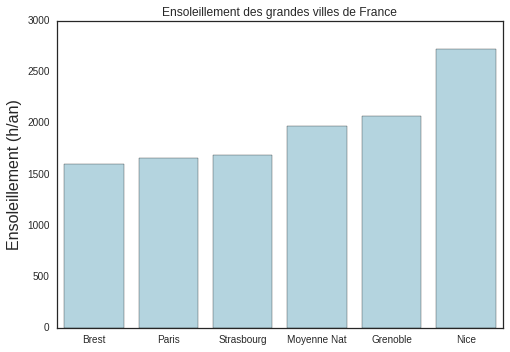

In [15]:
classeParEnsoleillement = df.sort_values(by='Ensoleillement (h/an)')
with sns.axes_style("white"):
    sns.barplot(x = ['Brest','Paris','Strasbourg','Moyenne Nat','Grenoble','Nice'],
                y="Ensoleillement (h/an)",data = classeParEnsoleillement,color="lightblue")
    plt.title('Ensoleillement des grandes villes de France')
    plt.ylabel('Ensoleillement (h/an)', fontsize=16)

In [20]:
classeParPluviometrie = df.sort_values(by='Pluie (mm/an)')
classeParPluviometrie

,Ensoleillement (h/an),Pluie (mm/an),Neige (j/an),Orage (j/an),Brouillard (j/an)
Paris,1661.0,637.0,12.0,18.0,10.0
Strasbourg,1693.0,665.0,29.0,29.0,53.0
Nice,2724.0,733.0,1.0,29.0,1.0
Moyenne nationale,1973.0,770.0,14.0,22.0,40.0
Grenoble (Aéroport Grenoble-Isère),2066.0,934.0,17.0,32.0,28.0
Brest,1605.0,1211.0,7.0,12.0,75.0


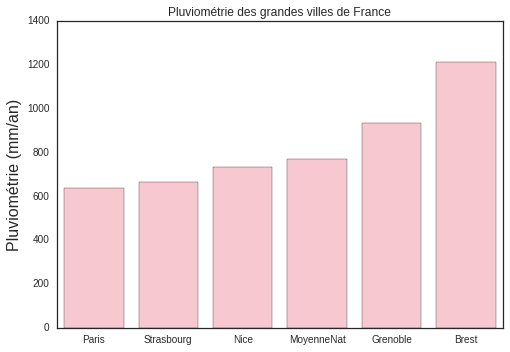

In [21]:
with sns.axes_style("white"):
    sns.barplot(x = ['Paris','Strasbourg','Nice','MoyenneNat','Grenoble','Brest'],
                y="Pluie (mm/an)",data = classeParPluviometrie,color="pink")
    plt.title('Pluviométrie des grandes villes de France')
    plt.ylabel('Pluviométrie (mm/an)', fontsize=16)